# Genetic Linear Regression with Numpy
A solution... via evolution!

In [322]:
import numpy as np
import matplotlib.pyplot as plt

In [311]:
sample_num = 10
beta_true = [3, 5]
x_obs = np.random.normal(5, 3, sample_num)
y_obs = beta_true[0] + beta_true[1]*x_obs + np.random.normal(x_obs, 2, sample_num)

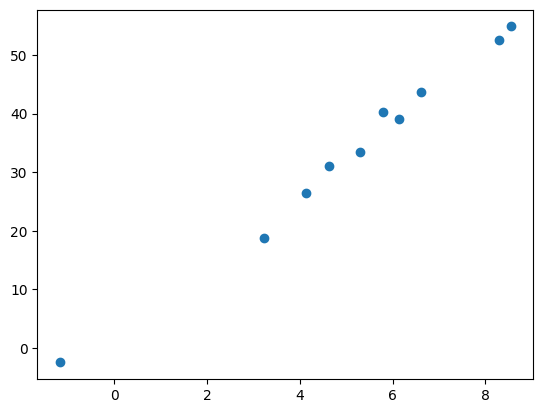

In [312]:
plt.scatter(x_obs, y_obs);

In [313]:
def fitness(beta):
    y_hat = beta[0] + x_obs*beta[1]
    rmse = np.sqrt(np.mean((y_hat - y_obs)**2))
    return rmse

In [244]:
beta = np.random.normal(-10,10, 2)
beta

array([ -2.84967731, -17.13110628])

In [314]:
fitness([  18.54413807,   3.36654949])

np.float64(7.505361456773878)

In [323]:
gen_size = 10
betas = np.random.normal(0, 10, (gen_size, 2))
betas

array([[ 17.02981298,   6.397697  ],
       [  8.7807527 , -10.9599045 ],
       [  6.15149197,  22.88220339],
       [  3.42648538,  22.60068446],
       [ 13.8999849 ,  16.88462672],
       [ -4.69379819,  -2.56425964],
       [ -3.8308622 ,  -8.34946189],
       [ -7.54421677,  -3.70975658],
       [ -4.12258281,  -0.57815806],
       [ -1.49314018,   6.09234899]])

In [324]:
def rank(betas, fitness):
    scored = np.column_stack((betas, np.apply_along_axis(fitness, axis=1, arr=betas))) 
    ranked = scored[scored[:, 2].argsort()]
    return ranked

In [338]:
ranked = rank(betas, fitness)
ranked[0][2]

np.float64(1.6894082193116031)

In [273]:
# selection
top_num = int(0.3*betas.shape[0])
survivors = ranked[:top_num]
survivors

array([[ 8.82563746,  5.43049652,  3.01468225],
       [-0.30784886,  7.16157456,  4.39431834],
       [-5.86176077,  5.26844229, 12.94305913]])

In [329]:
def select(ranked, frac):
    top_num = int(frac*ranked.shape[0])
    survivors = ranked[:top_num]
    return survivors

In [289]:
# crossover
cross_b0 = np.random.choice(survivors[:,0], size=gen_size, replace=True)
cross_b1 = np.random.choice(survivors[:,1], size=gen_size, replace=True)
cross_betas = np.column_stack((cross_b0, cross_b1))

# mutation
mut = np.random.normal(0, 1, (gen_size, 2))

betas = cross_betas + mut
betas

array([[-0.41401975,  7.00685483],
       [-1.10499099,  6.74137172],
       [-5.48688157,  4.06484199],
       [-2.20819581,  4.77656722],
       [-6.15780444,  5.85793823],
       [ 0.49973848,  4.00719422],
       [ 0.41496576,  5.3531878 ],
       [ 9.18664154,  7.19113514],
       [ 8.42713916,  8.1524785 ],
       [-4.46256206,  5.84369234]])

In [279]:
betas + mut

array([[-4.23438012,  3.89439324],
       [ 7.0471856 ,  5.41578077],
       [ 8.43401771,  5.83348836],
       [-0.47134067,  6.26662166],
       [10.5508555 ,  6.09853122],
       [ 0.66865011,  7.09214429],
       [ 9.28926895,  7.58811611],
       [ 7.95823808,  4.4486359 ],
       [-4.98544228,  7.42151411],
       [ 9.0729611 ,  7.82712536]])

In [173]:
np.random.normal(survivors[0,0], 3, 5)

array([-3.65833812,  4.59164743, -4.32214465,  1.15297178, -3.40671887])

In [347]:
gen_size = 100
betas = np.random.normal(0, 20, (gen_size, 2))
best_fit = []
verbose = False
for gen in range(10):
    if verbose:
        print(f"Generation: {gen}")
    
    # ranking
    ranked = rank(betas, fitness)
    best_fit.append(ranked[0][2])
    
    # selection
    survivors = select(ranked, 0.2)
    
    if verbose:
        print(survivors)
    
    # crossover
    cross_b0 = np.random.choice(survivors[:,0], size=gen_size, replace=True)
    cross_b1 = np.random.choice(survivors[:,1], size=gen_size, replace=True)
    cross_betas = np.column_stack((cross_b0, cross_b1))
    
    # mutation
    mut = np.random.normal(0, 1, (gen_size, 2))

    # next generation
    betas = cross_betas + mut

    if verbose:
        print(betas[:10])
        print('\n')

# print(betas[:10])


In [348]:
best_fit

[np.float64(3.777152950837451),
 np.float64(2.089993436027824),
 np.float64(1.7752211925704071),
 np.float64(1.6691929536983745),
 np.float64(1.7473545319621773),
 np.float64(1.6577136061517503),
 np.float64(1.6085893396893838),
 np.float64(1.6171659942938315),
 np.float64(1.6103917102307157),
 np.float64(1.683328933800513)]

np.float64(6.135552503698909)

In [71]:
x_matrix = np.hstack((x.reshape(-1, 1), np.ones((10,1))))
x_matrix

array([[4.55887544, 1.        ],
       [4.75371208, 1.        ],
       [5.9416388 , 1.        ],
       [2.93875297, 1.        ],
       [4.88767311, 1.        ],
       [4.01543479, 1.        ],
       [6.07250081, 1.        ],
       [6.79460769, 1.        ],
       [4.52476698, 1.        ],
       [4.60889876, 1.        ]])

In [84]:
beta

array([[-10.69567271,  -2.33136499],
       [-19.44142261, -18.04879131],
       [-12.30165864, -12.56716259],
       [ -8.59129223, -22.16883844]])

In [85]:
np.dot(x_matrix, beta.T)

array([[ -51.09160463, -106.67981536,  -68.648892  ,  -61.33546956],
       [ -53.17551362, -110.46771692,  -71.04570589,  -63.00936812],
       [ -65.88118895, -133.56270217,  -85.6591748 ,  -73.21519365],
       [ -33.76330499,  -75.18232984,  -48.71869849,  -47.41652402],
       [ -54.60831696, -113.07210993,  -72.69364876,  -64.16026648],
       [ -45.27914127,  -96.11455597,  -61.9636706 ,  -56.66661211],
       [ -67.28084621, -136.10684588,  -87.26899462,  -74.33946745],
       [ -75.00426504, -150.14563086,  -96.15210692,  -80.54329865],
       [ -50.72679175, -106.01669846,  -68.22930142,  -61.04243385],
       [ -51.62663772, -107.65233993,  -69.26426184,  -61.76523455]])

In [32]:
y_hat = x*beta[:, 1] + beta[:, 0]

ValueError: operands could not be broadcast together with shapes (100,) (10,) 

In [21]:
error = y - y_hat
error

array([16.98337177, 15.454338  , 17.35895701, 14.50995236, 13.61898471,
       14.23902465, 16.75154045, 15.15445358, 15.89961136, 16.69344591,
       15.43777389, 16.76813966, 16.157984  , 15.0901266 , 16.03939055,
       15.78478258, 13.69721687, 17.98087779, 14.54354204, 16.32711209,
       15.9338782 , 15.10644838, 15.69235247, 16.07706045, 15.41262249,
       15.94512809, 17.86426021, 17.50999948, 14.05215895, 14.70034295,
       13.23922741, 14.84531573, 14.57854025, 17.99219944, 15.64284187,
       12.78977828, 17.58379987, 16.59693074, 16.08540482, 17.09234947,
       17.56782231, 16.36729244, 15.65817837, 16.58021579, 16.22632692,
       15.98884064, 14.42610487, 14.74419767, 16.55978783, 15.13212749,
       17.53615194, 14.72290724, 15.71490761, 16.98097525, 16.9099587 ,
       13.21148041, 16.48630164, 18.35893452, 18.02450256, 15.38424723,
       13.88810785, 15.87102763, 16.80165167, 15.36783725, 17.07681592,
       15.48801469, 19.29857447, 15.6691447 , 16.29912934, 17.12

In [24]:
np.sqrt(np.mean(error**2))

np.float64(16.128328624738035)